## Observations and Insights 

* Based on the data below, it is clear that Capomulin and Ramicane have both the strongest results in the study and also quite similar impacts on average tumor volumes.  Whilst both drug regimens have significantly higher treatment numbers than the remaining regimens (refer Bar and Pie Charts: Capomulin 230 and Ramican 228), average tumor volume (mm3) was noticably lower (refer Summary Statistics [mean] column).  Variability of the results for both drug regimens was also comparatively low, as shown in the Summary Statistics table [Std] column and the Final Tumor Volume Statistics table [Inter Quartile] column figures.  The strong and comparable results for both drugs, is best demonstrated in the boxplot below (refer "Final Tumor Volume").

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset  
all_results_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
all_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
all_results_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_rows = all_results_df[all_results_df.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID
print(duplicate_rows)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_results_df = all_results_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_results_df = cleaned_results_df.reset_index()
del cleaned_results_df["index"]
cleaned_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
cleaned_results_df["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

means = cleaned_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
medians = cleaned_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
stds = cleaned_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
vars = cleaned_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sems = cleaned_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

frame = {'Mean': means, 'Median': medians, 'Std Dev': stds,'Variance': vars,'SEM': sems} 
summary = pd.DataFrame(frame) 

# Reformat output for display
summary['Mean'] = summary['Mean'].map("{:,.2f}".format)
summary['Median'] = summary['Median'].map("{:,.2f}".format)
summary['Std Dev'] = summary['Std Dev'].map("{:,.2f}".format)
summary['Variance'] = summary['Variance'].map("{:,.2f}".format)
summary['SEM'] = summary['SEM'].map("{:,.2f}".format)

print(summary)
type(summary)


               Mean Median Std Dev Variance   SEM
Drug Regimen                                     
Capomulin     40.68  41.56    4.99    24.95  0.33
Ceftamin      52.59  51.78    6.27    39.29  0.47
Infubinol     52.88  51.82    6.57    43.13  0.49
Ketapril      55.24  53.70    8.28    68.55  0.60
Naftisol      54.33  52.51    8.13    66.17  0.60
Placebo       54.03  52.29    7.82    61.17  0.58
Propriva      52.39  50.91    6.57    43.14  0.53
Ramicane      40.22  40.67    4.85    23.49  0.32
Stelasyn      54.23  52.43    7.71    59.45  0.57
Zoniferol     53.24  51.82    6.97    48.53  0.52


pandas.core.frame.DataFrame

***Ignored as confirmed that only require one summary and not summaries done 2 different ways

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

*** Treatment defined as a 'dose' rather than 'unique' mice to each drug regimen following discussion with my TA.  Code for unique in following markdown cell

unique_mice = cleaned_results_df.groupby(["Mouse ID"]).max()
mice_count = unique_mice["Drug Regimen"].value_counts()

mice_count.plot(kind="bar", figsize=(7,5), title ="Total Number of Mice per Treatment" )
plt.tight_layout()
plt.show()

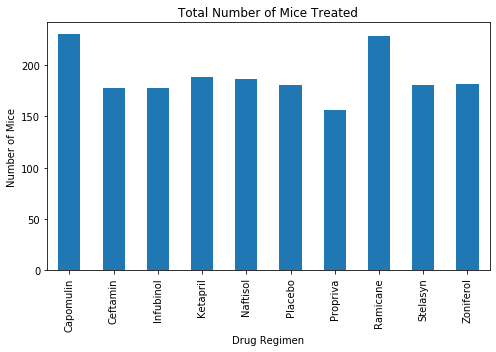

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = cleaned_results_df.groupby(["Drug Regimen"])["Mouse ID"].count()

plt.ylabel("Number of Mice")
mice_count.plot(kind="bar", figsize=(7,5), title ="Total Number of Mice Treated" )

plt.tight_layout()
plt.show()


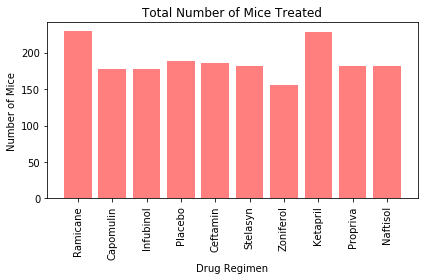

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
unique_regimens = cleaned_results_df["Drug Regimen"].unique()
x_axis = np.arange(len(unique_regimens))
x_labels = [regimen for regimen in unique_regimens]

y_axis = mice_count
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels,rotation = 'vertical')

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.title("Total Number of Mice Treated")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.show()


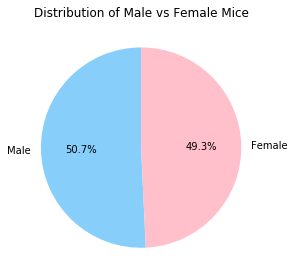

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaned_results_df["Sex"].value_counts()
labels = gender_count.index

sizes = [gender_count[0],gender_count[1]]

colors = ["lightskyblue","pink"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)


plt.title("Distribution of Male vs Female Mice")
plt.tight_layout()
plt.show()


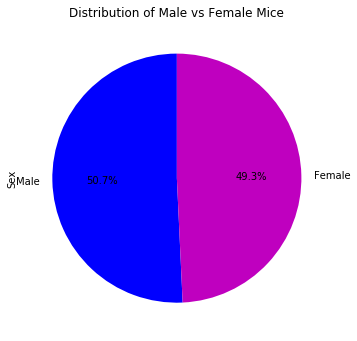

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
color = ['b', 'm']

gender_count.plot(kind="pie", figsize=(5,5), colors=color, autopct='%1.1f%%', startangle=90, 
                  title="Distribution of Male vs Female Mice")

plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = cleaned_results_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_df = pd.merge(max_mouse,cleaned_results_df, on=["Mouse ID","Timepoint"],how="left")


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

#Create dictionary to convert to dataframe for output
output =[]

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range (0, len(treatments)):
    series = merged_data_df.loc[merged_data_df["Drug Regimen"] == treatments[i],("Drug Regimen","Tumor Volume (mm3)")]

    # Add subset 
    if i == 0:
        tumor_vols = series
    else:
        tumor_vols = tumor_vols.append(series)
     
    # Determine outliers using upper and lower bounds
    tumors = series["Tumor Volume (mm3)"] 
    
    quartiles = tumors.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_count =  series.loc[(series["Tumor Volume (mm3)"] > upper_bound)|
                                (series["Tumor Volume (mm3)"] < lower_bound)
                               ]["Tumor Volume (mm3)"].count()
    outlier_vol = series.loc[(series["Tumor Volume (mm3)"] > upper_bound)|
                                (series["Tumor Volume (mm3)"] < lower_bound)
                               ]["Tumor Volume (mm3)"].sum()
   
    # Update dictionary for output dataframe
    output.append({"Treatment": treatments[i],"Lower Quartile":lowerq, "Median":quartiles[0.5], "Upper Quartile":upperq, 
               "InterQuartile":iqr, "Lower Bound":lower_bound, "Upper Bound":upper_bound, "No. of Outliers":outlier_count})  
    
    # Print outlier for regimen
    if outlier_count >= 1:
        print(f"{treatments[i]} had {outlier_count} outlier(s).  The tumor volume was {outlier_vol}")

# Convert dictionary to dataframe and print
output_df = pd.DataFrame(output)

# Reformat output for display
output_df['Lower Quartile'] = output_df['Lower Quartile'].map("{:,.2f}".format)
output_df['Median'] = output_df['Median'].map("{:,.2f}".format)
output_df['Upper Quartile'] = output_df['Upper Quartile'].map("{:,.2f}".format)
output_df['InterQuartile'] = output_df['InterQuartile'].map("{:,.2f}".format)
output_df['Lower Bound'] = output_df['Lower Bound'].map("{:,.2f}".format)
output_df['Upper Bound'] = output_df['Upper Bound'].map("{:,.2f}".format)

print("\n\n\nFinal Tumor Volume Statistics")
output_df


Infubinol had 1 outlier(s).  The tumor volume was 36.321345799999996



Final Tumor Volume Statistics


,Treatment,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,Capomulin,32.38,38.13,40.16,7.78,20.70,51.83,0
1,Ramicane,31.56,36.56,40.66,9.10,17.91,54.31,0
2,Infubinol,54.05,60.17,65.53,11.48,36.83,82.74,1
3,Ceftamin,48.72,59.85,64.30,15.58,25.36,87.67,0


In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a series for each regimen for the boxplots
Capomulin =  tumor_vols.loc[tumor_vols["Drug Regimen"] == treatments[0],("Tumor Volume (mm3)")]
Ramicane =  tumor_vols.loc[tumor_vols["Drug Regimen"] == treatments[1],("Tumor Volume (mm3)")]
Infubinol =  tumor_vols.loc[tumor_vols["Drug Regimen"] == treatments[2],("Tumor Volume (mm3)")]
Ceftamin =  tumor_vols.loc[tumor_vols["Drug Regimen"] == treatments[3],("Tumor Volume (mm3)")]


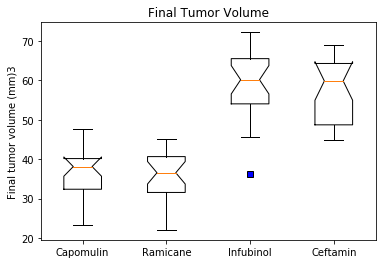

In [18]:
data = [Capomulin, Ramicane, Infubinol, Ceftamin]
blue_square = dict(markerfacecolor='b', marker='s')
fig1, ax1 = plt.subplots()

ax1.set_title('Final Tumor Volume')
ax1.boxplot(data, notch=True,labels = treatments, flierprops=blue_square)
ax1.set_ylabel("Final tumor volume (mm)3")

plt.show()


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint_df = cleaned_results_df.loc[cleaned_results_df["Mouse ID"] =="s185"]
tumor_vol = timepoint_df["Tumor Volume (mm3)"]
timepoints = timepoint_df["Timepoint"]

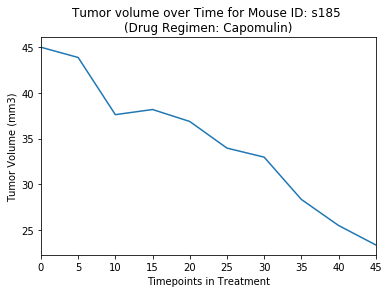

In [20]:
plt.plot(timepoints, tumor_vol)

plt.xlabel("Timepoints in Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume over Time for Mouse ID: s185 \n(Drug Regimen: Capomulin)")

tick_locations = []
for x in timepoints:
    tick_locations.append(x)
    
plt.xticks(tick_locations, timepoints)

xlim_max = timepoint_df["Timepoint"].max()
xlim_min = timepoint_df["Timepoint"].min()
plt.xlim(xlim_min,xlim_max)

plt.show()


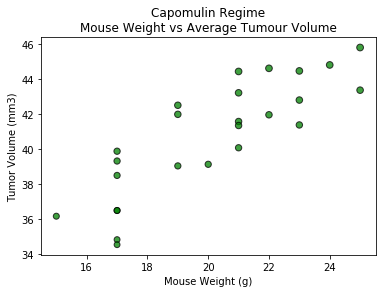

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
columns = ["Drug Regimen","Mouse ID","Weight (g)","Tumor Volume (mm3)"]
data_df = cleaned_results_df.loc[:,columns]
regimens_df = data_df.loc[cleaned_results_df["Drug Regimen"] == "Capomulin"]

weight = regimens_df.groupby(["Mouse ID"])["Weight (g)"].mean()
avg_tumor = regimens_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

x_limit = weight * 1.1
y_limit = avg_tumor * 1.1

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regime\nMouse Weight vs Average Tumour Volume")

plt.scatter(weight, avg_tumor, marker="o", facecolors="green", edgecolors="black",
            s=avg_tumor, alpha=.75)

plt.show()

## Correlation and Regression

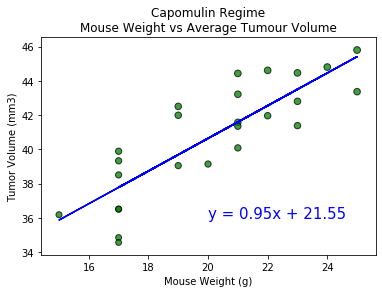

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(weight,regress_values,"r-",color ="blue")

plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
plt.scatter(weight, avg_tumor, marker="o", facecolors="green", edgecolors="black",
            s=avg_tumor, alpha=.75)

x_limit = weight * 1.1
y_limit = avg_tumor * 1.1


plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regime\nMouse Weight vs Average Tumour Volume")
plt.show()


In [23]:
correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
